In [1]:
import pandas as pd
import numpy as np

/tmp/ipykernel_19577/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../dataset/mental_health_finaldata_1.csv')

In [3]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [4]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [39]:
col = []

for column in df.columns:
    col.append(column)

In [40]:
col

['Age',
 'Gender',
 'Occupation',
 'Days_Indoors',
 'Growing_Stress',
 'Quarantine_Frustrations',
 'Changes_Habits',
 'Mental_Health_History',
 'Weight_Change',
 'Mood_Swings',
 'Coping_Struggles',
 'Work_Interest',
 'Social_Weakness']

In [43]:
from category_encoders import BinaryEncoder,OrdinalEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc = OrdinalEncoder(cols=col)

In [45]:
enc.fit(df)

OrdinalEncoder(cols=['Age', 'Gender', 'Occupation', 'Days_Indoors',
                     'Growing_Stress', 'Quarantine_Frustrations',
                     'Changes_Habits', 'Mental_Health_History', 'Weight_Change',
                     'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
                     'Social_Weakness'],
               mapping=[{'col': 'Age', 'data_type': dtype('O'),
                         'mapping': 20-25       1
30-Above    2
25-30       3
16-20       4
NaN        -2
dtype: int64},
                        {'col': 'Gender', 'd...
dtype: int64},
                        {'col': 'Mood_Swings', 'data_type': dtype('O'),
                         'mapping': Medium    1
High      2
Low       3
NaN      -2
dtype: int64},
                        {'col': 'Coping_Struggles', 'data_type': dtype('O'),
                         'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                        {'col': 'Work_Interest', 'data_type': dtype('O'),
                         'mapping': No       1
Maybe    2
Yes      3
NaN     -2
dtype: int64},
                        {'col': 'Social_Weakness', 'data_type': dtype('O'),
                         'mapping': Yes      1
No       2
Maybe    3
NaN     -2
dtype: int64}])

In [46]:
df_num = enc.transform(df)

In [47]:
df_num

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,1,1,2,2,2,2,1,1,1
2,2,1,3,3,2,2,3,2,2,1,2,2,2
3,3,2,2,1,1,2,2,2,3,1,1,2,1
4,4,1,3,4,1,1,3,2,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1,2,1,3,2,1,1,1,1,1,1,3,3
820,1,2,2,1,1,1,1,1,3,3,1,2,3
821,1,2,3,4,1,3,2,2,1,2,2,3,3
822,4,2,5,5,2,2,2,2,3,3,2,1,3


In [48]:
from sklearn.cluster import KMeans

In [49]:
v=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit_predict(df_num)
    v.append(model.inertia_)



In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

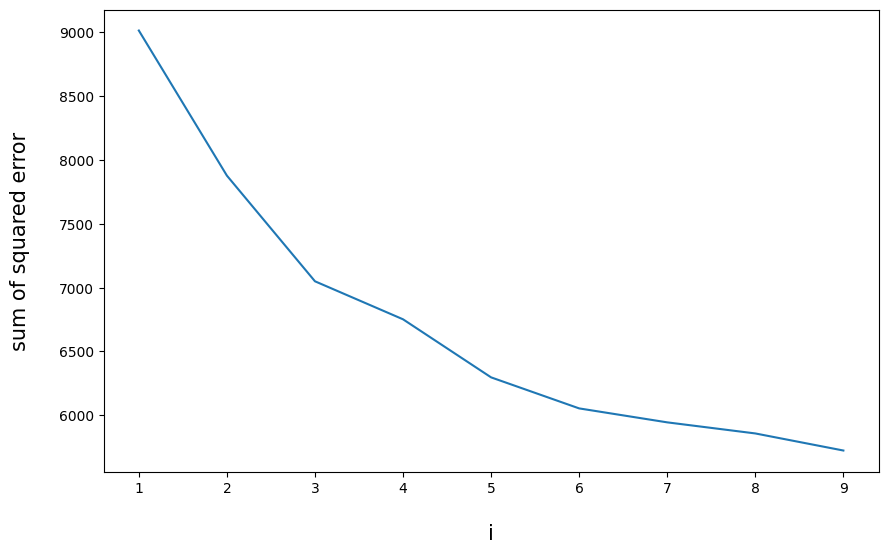

In [51]:
plt.figure(figsize=(10,6))     
plt.xlabel("\ni",fontsize=15)
plt.ylabel("sum of squared error\n",fontsize=15)
plt.plot(range(1,10),v);

In [52]:
model = KMeans(n_clusters=2)
pred = model.fit_predict(df_num)
pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

Text(0, 0.5, 'Occupation')

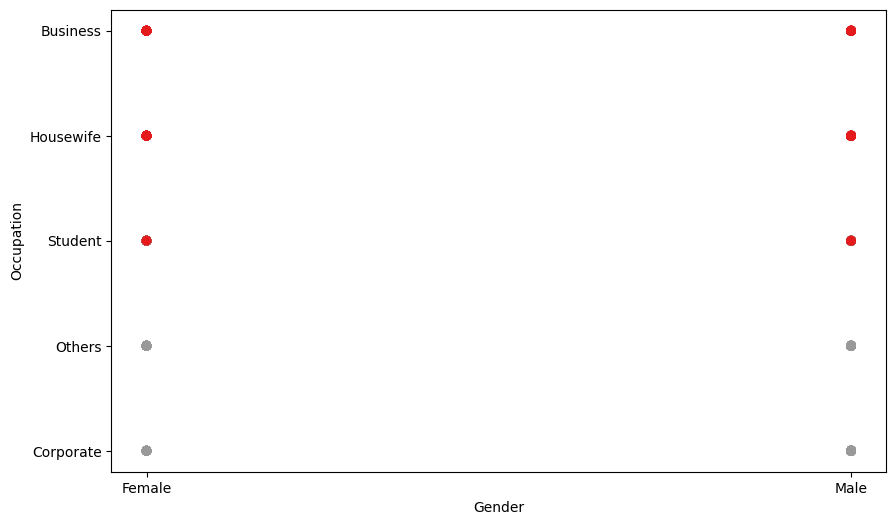

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df.Gender, df.Occupation, c=pred, cmap='Set1')
plt.xlabel('Gender')
plt.ylabel('Occupation')

Text(0, 0.5, 'Mental Health History')

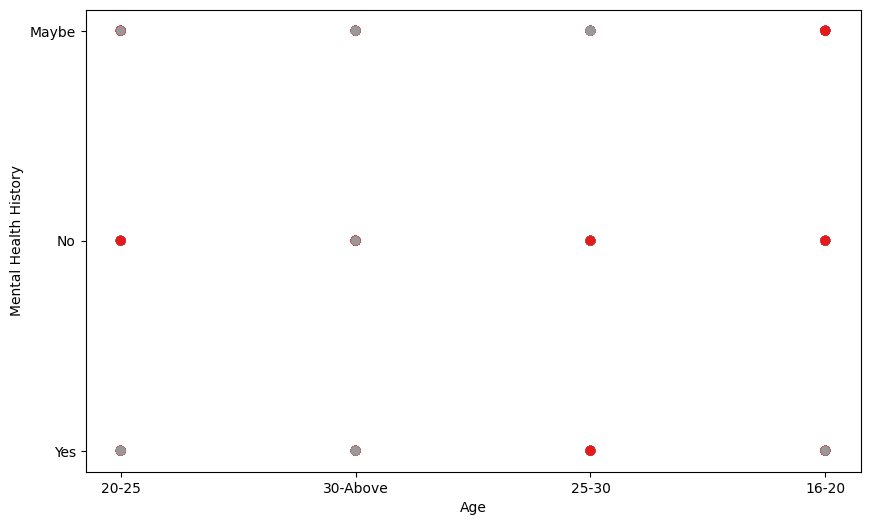

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df.Age, df.Mental_Health_History, c=pred, cmap='Set1')
plt.xlabel('Age')
plt.ylabel('Mental Health History')

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_score(df_num, labels=model.labels_,metric='euclidean')

0.1190358586813234

In [63]:
deppressed1 = pd.DataFrame(df_num)
deppressed1['cluster'] = pred

In [61]:
deppressed = pd.DataFrame(df)
deppressed['cluster'] = pred
deppressed['cluster'].value_counts()

cluster
0    434
1    390
Name: count, dtype: int64

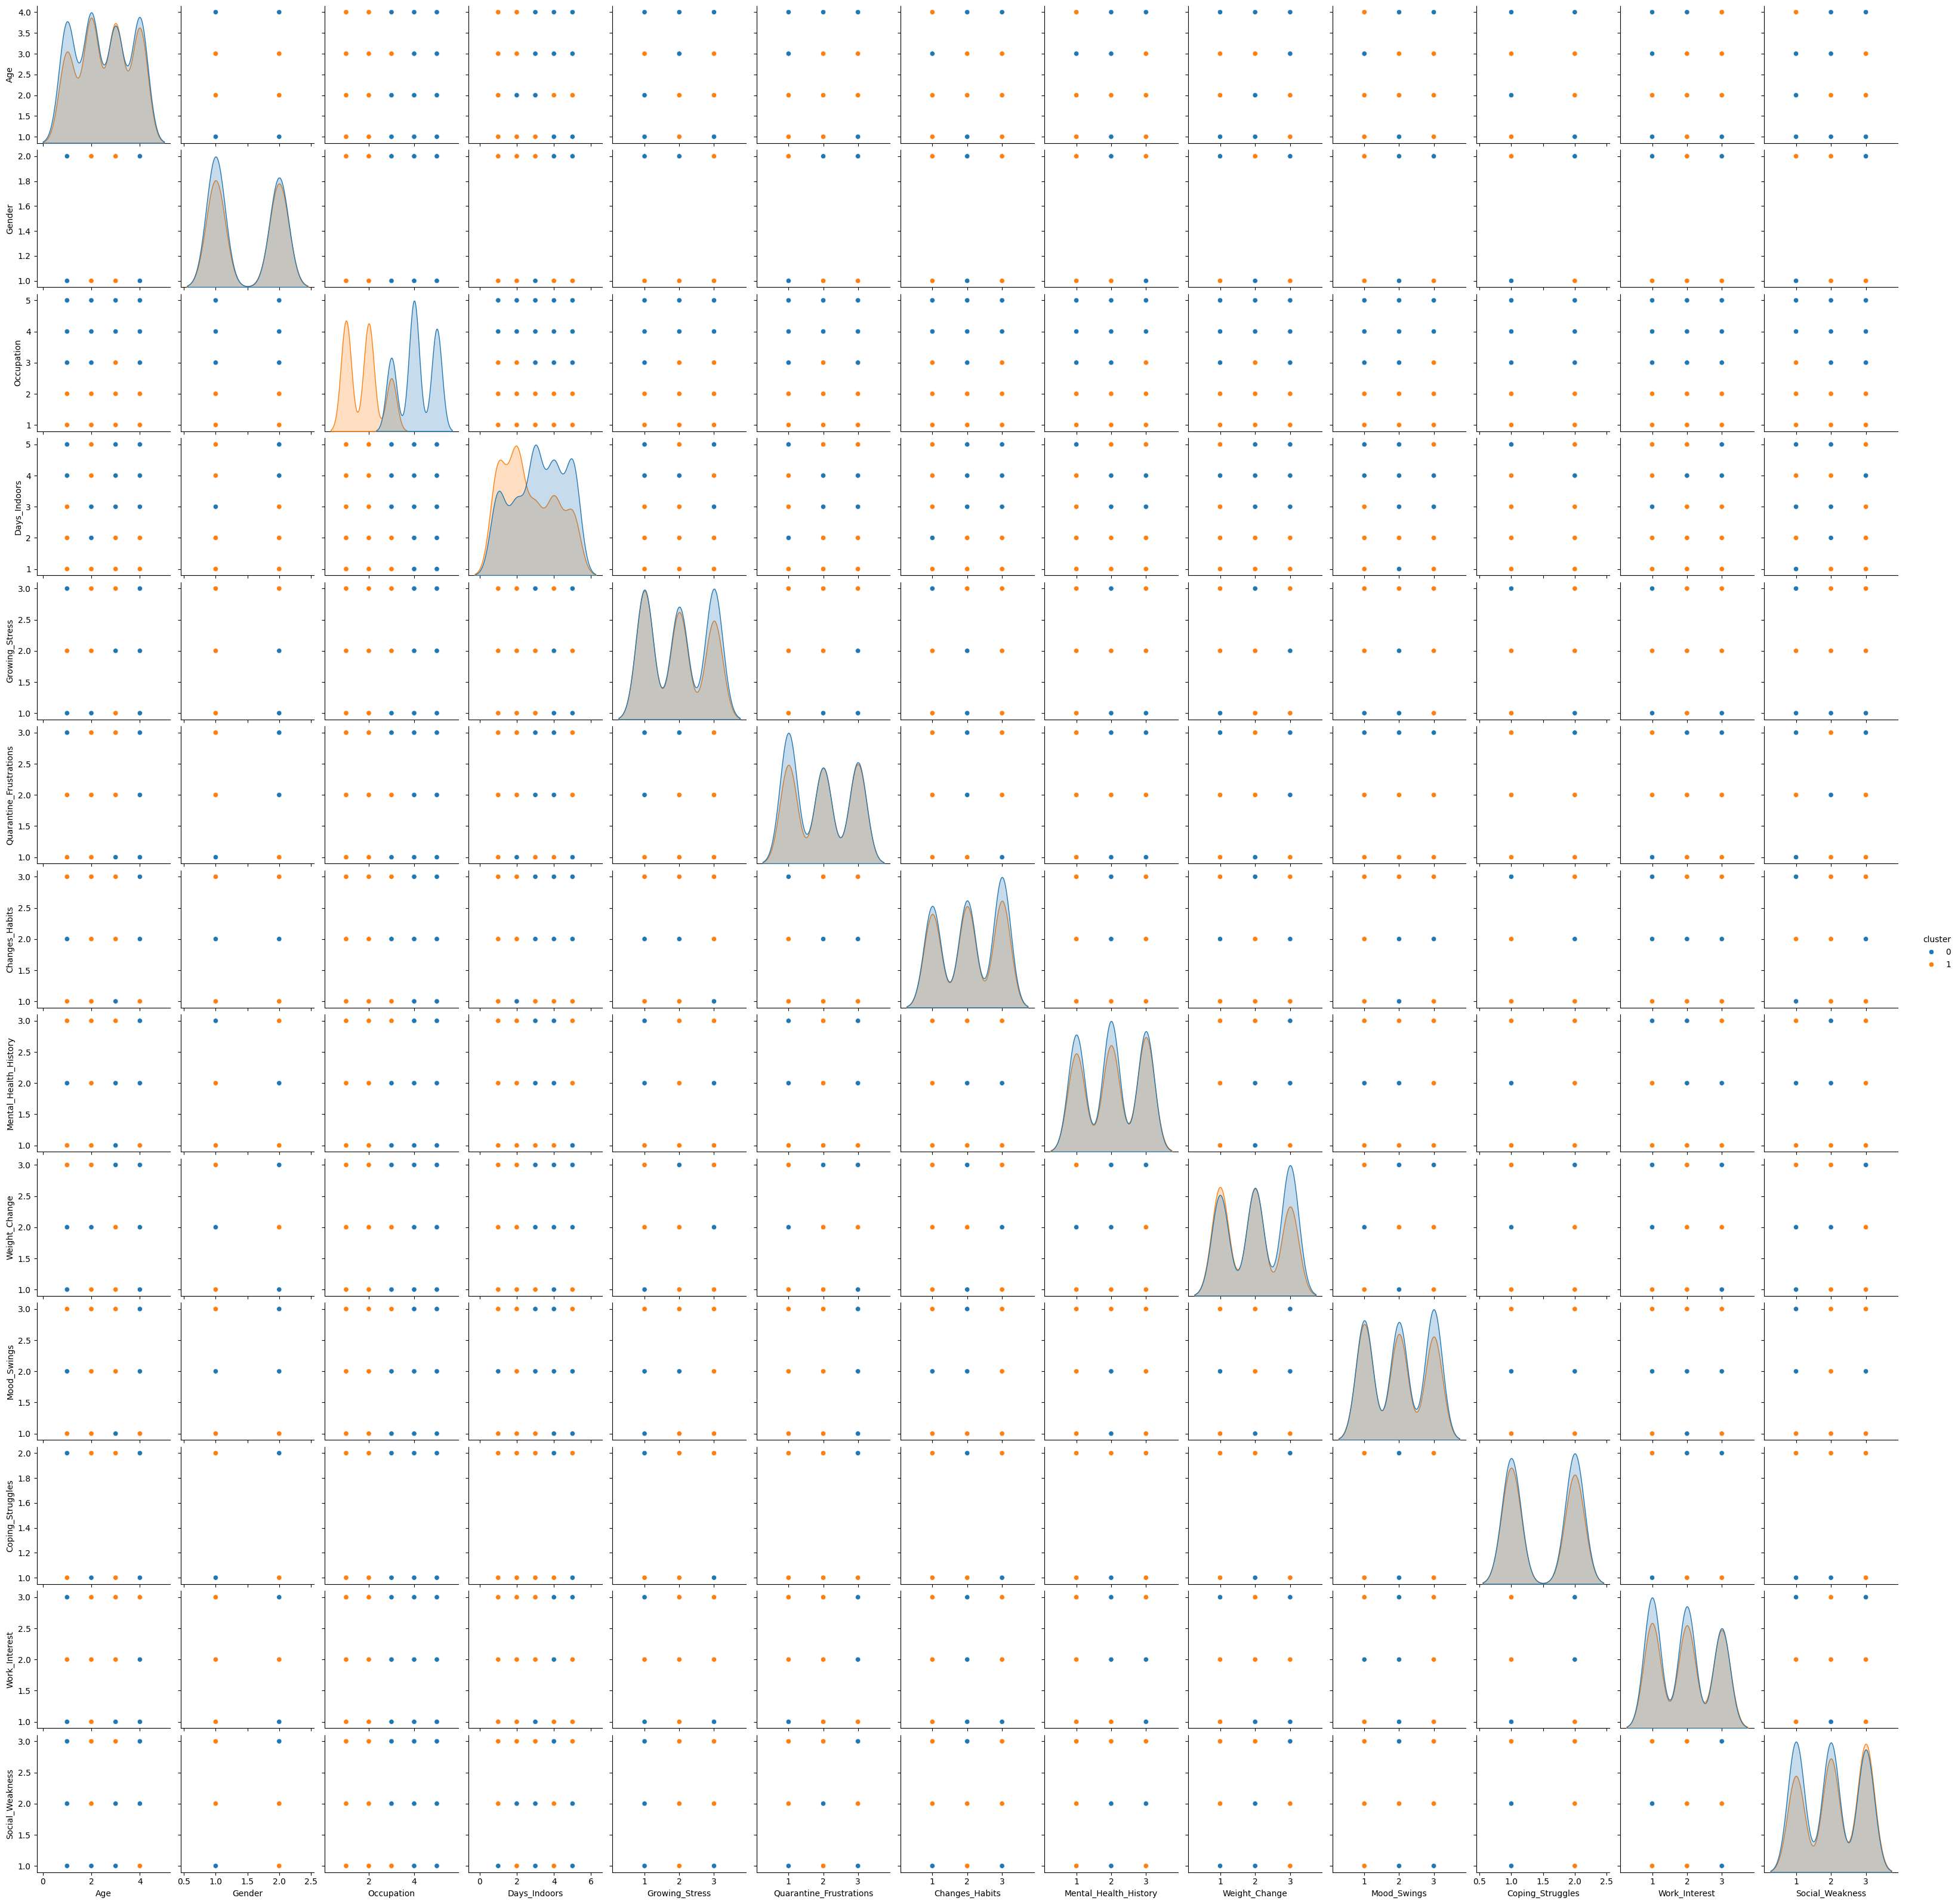

In [64]:
sns.pairplot(deppressed1, hue ='cluster')